In [9]:
using PyPlot
using Distributions
using QuantEcon: meshgrid

In [10]:
function buildDensityFor(xs)
    return function (μ, σ)
        local n = length(xs)
        (σ * sqrt(2pi))^-n * exp(-sum((xs - μ).^2) / (2σ^2))
    end
end;

In [11]:
function buildLogLikelihoodFor(xs)
    local n = length(xs)
    return function (μ, σ)
        -n * log(σ) - n * log(sqrt(2pi)) - sum((xs - μ).^2) / (2σ^2)
    end
end;

In [12]:
function buildGradientFor(xs)
    local n = length(xs)
    return (μ, σ) -> [
        sum(xs - μ) / σ^2;
        -n / σ + sum((xs - μ).^2) / σ^3
    ]
end;

In [13]:
function buildHessianFor(xs)
    local n = length(xs)
    return (μ, σ) -> [
        -n / σ^2 -2 * sum(xs - μ) / σ^3;
        -2 * sum(xs - μ) / σ^3 n / σ^2 - 3 * sum((xs - μ).^2) / σ^4
    ]
end;

In [16]:
n = 100
xs = rand(Normal(0, 1), n)

logL = buildLogLikelihoodFor(xs)
grad = buildGradientFor(xs)
hessian = buildHessianFor(xs)

μ′ = mean(xs)
σ′ = sqrt(sum((xs - μ′).^2) / n)

grad′ = grad(μ′, σ′)
hessian′ = hessian(μ′, σ′)

μgrad = grad′[1]
σgrad = grad′[2]

μμ = hessian′[1, 1]
μσ = hessian′[1, 2]
σμ = hessian′[2, 1]
σσ = hessian′[2, 2]

(μgrad, σgrad, μμ, μσ, σμ, σσ)

(1.472965780940338e-15,1.4210854715202004e-14,-82.92060177715499,-2.682587372657173e-15,-2.682587372657173e-15,-165.84120355431)

In [17]:
n = 100

μ = linspace(-0.5, 0.5, n)
σ = linspace(0.75, 1.5, n)

xs = rand(Normal(0, 1), n)

logL = buildLogLikelihoodFor(xs)
∇ = buildGradientFor(xs)
∇2 = buildHessianFor(xs)

z = Array{Float64}(n, n)

for i in 1:n
    for j in 1:n
        z[j, i] = logL(μ[i], σ[j])
    end
end

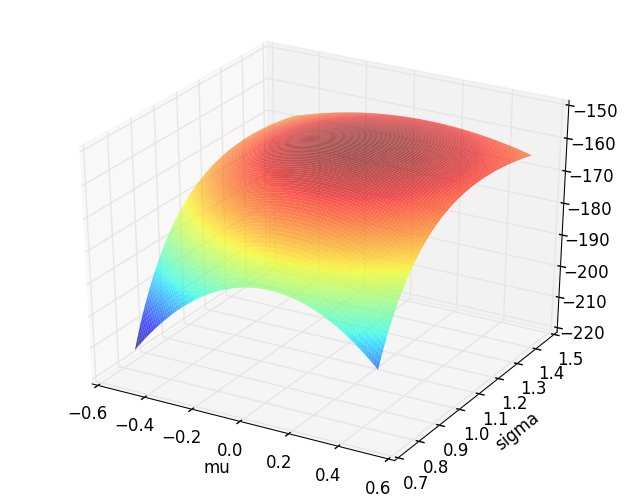

In [18]:
fig = figure(figsize=(8,6))
ax = fig[:gca](projection="3d")
# ax[:set_zlim](-900, 1)
μgrid, σgrid = meshgrid(collect(μ), collect(σ))
xlabel("mu")
ylabel("sigma")
ax[:plot_surface](  μgrid, σgrid, z,
                                rstride=1, cstride=1, cmap=ColorMap("jet"),
                                alpha=0.7, linewidth=0);